# EDSA Regression Project

### Project Title: Impact of Agri-food related emmisions on Climate Change - Regression Project.
#### Done By: Erich du Plessis

© ExploreAI 2024

---

## Table of Contents

<a id="cont"></a>

<a href=#INT>1. Introduction</a>

<a href=#packages>2. Importing Packages</a>

<a href=#Data>3. Loading Data </a>

<a href=#Cleaning>4. Data Cleaning and Pre-Processing</a>

<a href=#EDA>5. Exploratory Data Analysis (EDA)</a>

<a href=#Feature>6. Feature Engineering</a>

<a href=#Model>7. Model Training and Testing </a>

---
 <a id="BC"></a>
## **Introduction**
<a href=#cont>Back to Table of Contents</a>

---

This regression project requires us to analyse and predict the effect of CO2 emmisions from the agri-food sector on climate change. We will be using a comprehensive dataset compiled by the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC). From this dataset we will train regression models to predict the average temperature variations based on multiple factors and emmision sources linked to the agri-food sector.
We will use our insights gained and ML models to provide recommendations and sollutions to climate change related discussions and issues from the agri-food sector.<br>

**<ins>Data Library:</ins><br>**
The dataset includes information on various agri-food sector related emmision sources and highlights their contribution towards climate change.
- Savanna fires: Emissions from fires in savanna ecosystems.
- Forest fires: Emissions from fires in forested areas.
- Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
- Rice Cultivation: Emissions from methane released during rice cultivation.
- Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
- Pesticides Manufacturing: Emissions from the production of pesticides.
- Food Transport: Emissions from transporting food products.
- Forestland: Land covered by forests.
- Net Forest conversion: Change in forest area due to deforestation and afforestation.
- Food Household Consumption: Emissions from food consumption at the household level.
- Food Retail: Emissions from the operation of retail establishments selling food.
- On-farm Electricity Use: Electricity consumption on farms.
- Food Packaging: Emissions from the production and disposal of food packaging materials.
- Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
- Food Processing: Emissions from processing food products.
- Fertilizers Manufacturing: Emissions from the production of fertilizers.
- IPPU: Emissions from industrial processes and product use.
- Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
- Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
- Manure Management: Emissions from managing and treating animal manure.
- Fires in organic soils: Emissions from fires in organic soils.
- Fires in humid tropical forests: Emissions from fires in humid tropical forests.
- On-farm energy use: Energy consumption on farms.
- Rural population: Number of people living in rural areas.
- Urban population: Number of people living in urban areas.
- Total Population - Male: Total number of male individuals in the population.
- Total Population - Female: Total number of female individuals in the population.
- Total_emission: Total greenhouse gas emissions from various sources.
- Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius.

CO2 is measured in kilotonnes (kt).<br>
The average temperature will be our response / target variable and indicates the change in the average yearly temperature.<br>

---
 <a id="packages"></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

---

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

---
 <a id="Data"></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

---

In [59]:
# Load the dataset and store it in a pandas DataFrame
df_raw = pd.read_csv('co2_emissions_from_agri.csv')

---
 <a id="Cleaning"></a>
## **Data Cleaning and Pre-Processing**
<a href=#cont>Back to Table of Contents</a>

---

**<ins>Data:</ins>**<br>

In [63]:
# View the first 4 rows of the dataset to get familiar with the data
df_raw.head(4)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917


There are 31 columns in the dataset with emmision information from various sources in different regions and years. The dataset also contains the change in the average temperature as well as population metrics.

In [66]:
# Determine the number of total observations, countries and years
obs = len(df_raw)
countries = df_raw['Area'].nunique()
years = df_raw['Year'].nunique()

# Display the metrics calculated
print(f'Total Observations in the Dataset: {obs}')
print(f'Number of Areas: {countries}')
print(f'Number of Years: {years}')

Total Observations in the Dataset: 6965
Number of Areas: 236
Number of Years: 31


In [68]:
# View the different features and data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

Most variables are numeric while only the area variable contains string data. 

<br>

**<ins>Data Formatting:</ins>**<br>

In [73]:
# Replace spaces in the column names with underscores to maintain a consistent naming convention
df_raw.columns = df_raw.columns.str.replace(' ','_')
df_raw.columns

Index(['Area', 'Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail',
       'On-farm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
       'Fires_in_humid_tropical_forests', 'On-farm_energy_use',
       'Rural_population', 'Urban_population', 'Total_Population_-_Male',
       'Total_Population_-_Female', 'total_emission',
       'Average_Temperature_°C'],
      dtype='object')

<br>

**<ins>Duplicate Observations:</ins>**<br>

In [77]:
# Count the number of duplicated observations
df_raw.duplicated().sum()

0

There are no duplicate observations in the dataset.

<br>

**<ins>Outlier Analysis:</ins>**<br>
We will first view basic descriptive statistics (5 number summary) to identify any potential outliers or strang values.

In [82]:
# Summary statistics for the first 10 rows
df_raw.loc[:, 'Year':'Net_Forest_conversion'].describe()

,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06


In [84]:
# Summary statistics for the next 10 rows
df_raw.loc[:, 'Food_Household_Consumption':'Manure_left_on_Pasture'].describe()

,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture
count,6492.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.222000e+03,6037.000000,6965.000000
mean,4847.580384,2043.210539,1626.681460,1658.629808,6018.444633,3872.724461,3035.723356,1.999150e+04,923.225603,3518.026573
std,25789.143619,8494.249260,9343.182193,11481.343725,22156.742542,19838.216846,11693.029064,1.114209e+05,3226.992039,9103.556202
min,0.000000,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.000000e+00,0.049000,0.000700
25%,11.399950,26.818500,8.037600,67.631366,86.680500,209.587728,360.358799,3.903153e+01,16.303000,139.669900
50%,155.471100,172.042600,29.120700,74.018133,901.275700,344.760200,1115.052400,8.037066e+02,120.443900,972.567400
75%,1377.151950,1075.999100,499.944700,281.791000,3006.442100,1236.913400,2024.869900,6.155175e+03,460.120200,2430.792600
max,466288.200700,133784.065300,165676.299000,175741.306100,213289.701600,274253.512500,170826.423300,1.861641e+06,34677.360300,92630.756800


In [86]:
# Summary statistics for the remaining rows
df_raw.loc[:, 'Manure_Management':].describe()

,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
count,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


<br>

**<ins>Missing Data:</ins>**<br>

In [90]:
# Determine the percentage of null entries in each feature
percent_missing = df_raw.isna().sum() * 100 / len(df_raw)

# Include only features with null entries present and round the percentage to 2 decimals
round(percent_missing,2).sort_values(ascending = False)[lambda x: x > 0]

Crop_Residues                      19.94
On-farm_energy_use                 13.73
Manure_applied_to_Soils            13.32
Manure_Management                  13.32
IPPU                               10.67
Net_Forest_conversion               7.08
Forestland                          7.08
Food_Household_Consumption          6.79
Fires_in_humid_tropical_forests     2.23
Forest_fires                        1.34
Savanna_fires                       0.45
dtype: float64

There are a couple of features that have missing entries with Crop Residues having over 1300 missings. Before we address the missing value, we first have to understand how the missing values are distributed and whether they are systematic or random.<br>

We will now visualise how many missing entries there for each country, split by the different features listed above. This will tell us more about where the missing entries are and how many are missing for each area.

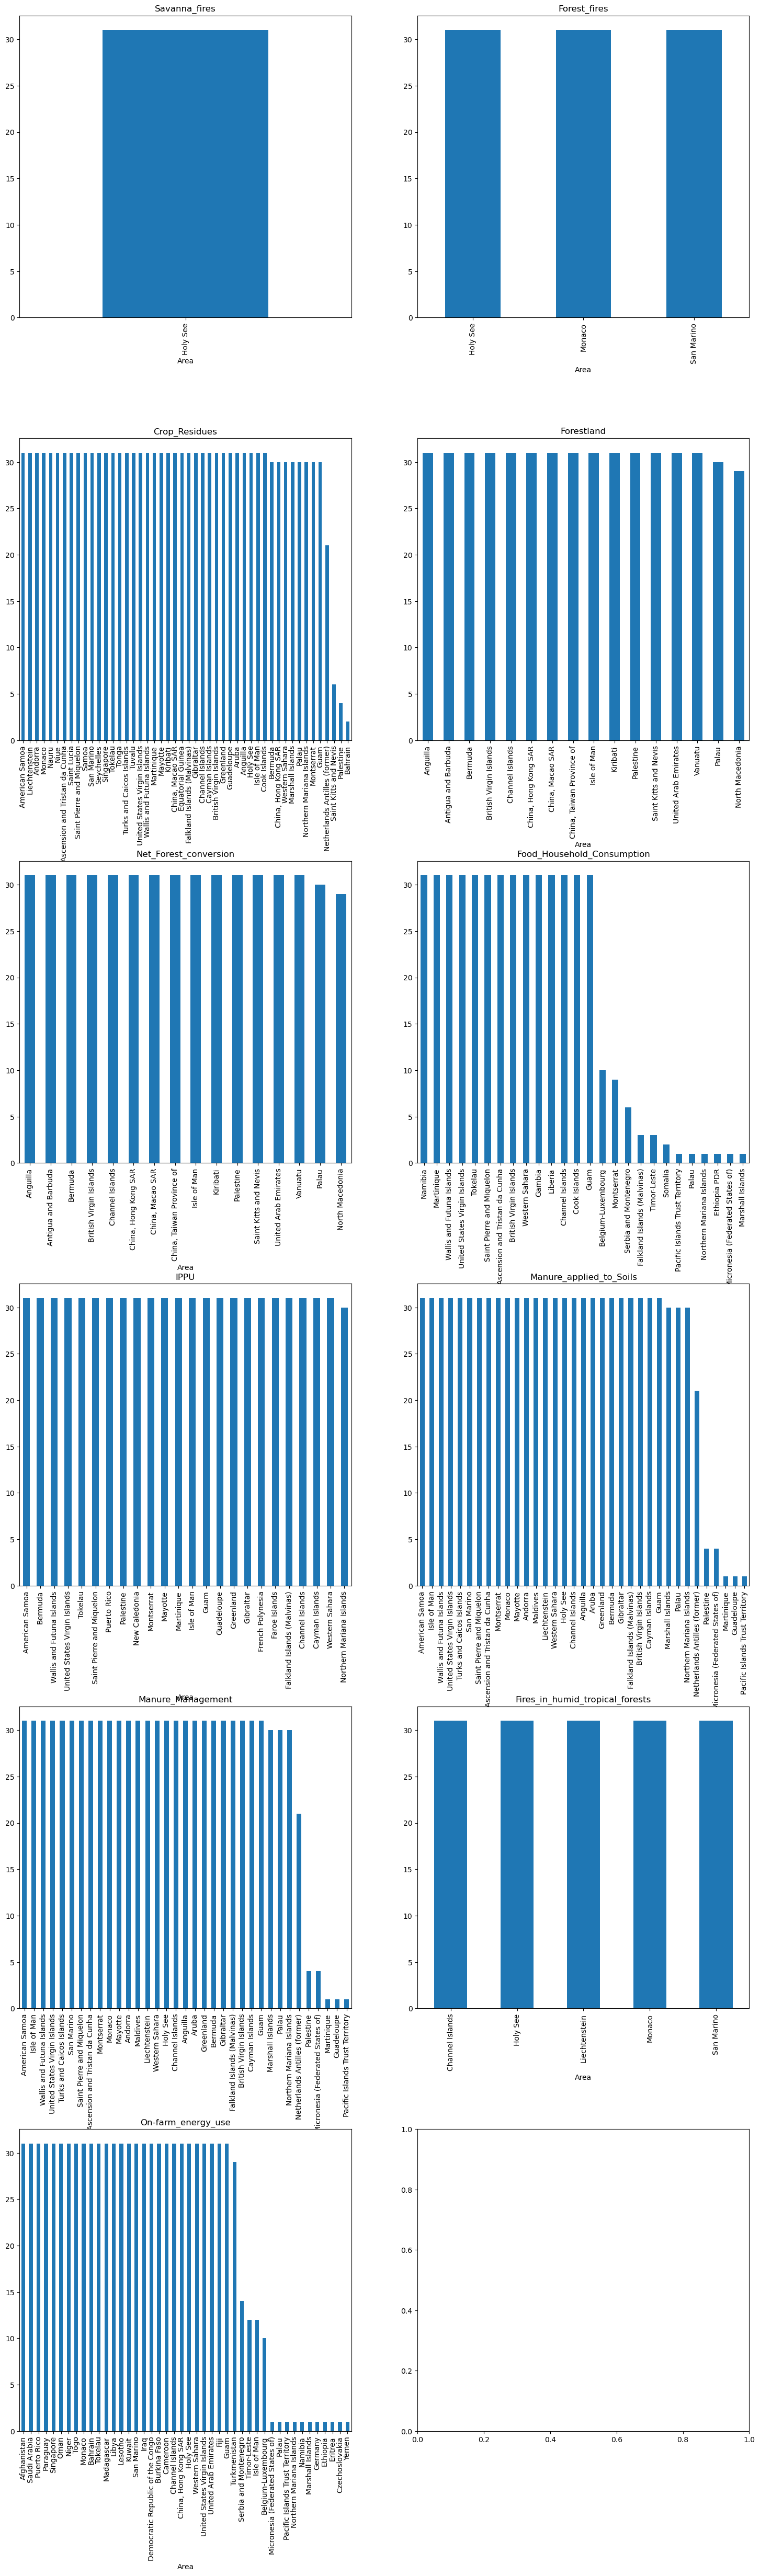

In [93]:
# Initiate the lists that will contain the series objects with the missing count of each area by feature
bar_list = []
feature_list = []
counter = 0

# Calculate and save the missing count for each filter, split by area
for feature in percent_missing[lambda x: x > 0].index:
    a = df_raw[df_raw[feature].isna()]['Area'].value_counts()
    bar_list.append(a)
    feature_list.append(feature)
    counter += 1

# Define the plot area that will be used to visualise the missing count distribution by area
fig, axes = plt.subplots(int(np.ceil(counter/2)), 2, figsize = (18,60))
fig.subplots_adjust(hspace = 0.4)
ax = axes.ravel()

# Plot bar graphs of the missing count by area and feature
for i in np.arange(0,counter):
    bar_list[i].plot.bar(ax = ax[i])
    ax[i].set_title(feature_list[i])

plt.show()

The bar graphs clearly show that in the majority of cases there are 31 missing entries per area. Since this is the same as the total number of observations we excpect for each area (Number of years included in the data), it means that there is no data available for that specific emmision source or feature in those countries. As a result, we can't use a simple mean / mode / median imputation from the countries to fill these missings. We could potentially use the mean or median from all countries combined, but this will likely result in incorrect data as not all areas are the same and are usually influenced by economical, political, social and geographical factors.<br>

We will use three different approaches to treat the missing values and compare model performance from the three datasets. We will apply the following techniques:

1. Feature Deletion: We will delete all columns that contain missing values to prevent them from influencing the regression models and also prevent the introduction of bias through imputation.
   
2. KNN Imputation: We will use KNN (K-Nearest Neighbour) imputation to predict the missing values. KNN imputation is a method that predicts missing values based on similar data points in the entire dataset. This means that existing relationships between features are preserved instead of applying an arbitrary mean imputation. This is therefore a from of predictive imputation. (For more information: https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/)

3. Deletion and KNN Imputation: Here we will delete columns with more than 10% missing values and impute the remaining missing values. This combination should benefit from both techniques where less bias is introduced from imputation while still maintaining feature relationships and more data points compared to full deletion.

a) <ins>Full Feature Deletion:</ins>

In [117]:
# Drop features with missing data
df_features_dropped = df_raw.drop(feature_list, axis = 1)
df_features_dropped.head(3)

,Area,Year,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,Manure_left_on_Pasture,Fires_in_organic_soils,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,686.00,0.0,11.807483,63.1152,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,1590.5319,0.0,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,678.16,0.0,11.712073,61.2125,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,1657.2364,0.0,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,686.00,0.0,11.712073,53.3170,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,1653.5068,0.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583


In [119]:
# Check for missing values
df_Features_dropped.isna().sum()

Area                               0
Year                               0
Rice_Cultivation                   0
Drained_organic_soils_(CO2)        0
Pesticides_Manufacturing           0
Food_Transport                     0
Food_Retail                        0
On-farm_Electricity_Use            0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
Manure_left_on_Pasture             0
Fires_in_organic_soils             0
Rural_population                   0
Urban_population                   0
Total_Population_-_Male            0
Total_Population_-_Female          0
total_emission                     0
Average_Temperature_°C             0
dtype: int64

b) <ins>KNN Imputation:</ins>

In [107]:
# Initiate the imputer object
imputer = KNNImputer(n_neighbors = 5)

# Perform the imputation and save the new dataframa
df_imputed = pd.DataFrame(imputer.fit_transform(df_raw.loc[:,'Year':]), columns = df_raw.loc[:,'Year':].columns)

# Add the Area variable back and convert year to int
df_imputation = pd.concat([df_raw[['Area']], df_imputed], ignore_index=False, sort=False, axis = 1)
df_imputation['Year'] = df_imputation['Year'].map(lambda x: int(x))

# Check for any missing values
df_imputation.isna().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Crop_Residues                      0
Rice_Cultivation                   0
Drained_organic_soils_(CO2)        0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
On-farm_Electricity_Use            0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
IPPU                               0
Manure_applied_to_Soils            0
Manure_left_on_Pasture             0
Manure_Management                  0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
On-farm_energy_use                 0
Rural_population                   0
Urban_population                   0
T

c) <ins>KNN Imputation and Deletion:</ins>

In [115]:
# Drop columns with more than 10% missing
df_dropped = df_raw.drop(percent_missing[lambda x: x > 10].index, axis = 1)

# Initiate the imputer object
imputer = KNNImputer(n_neighbors=5)

# Perform the imputation and save the new dataframa
df_imputed = pd.DataFrame(imputer.fit_transform(df_dropped.loc[0:,'Year':]), columns = df_dropped.loc[0:,'Year':].columns)

# Add the Area variable back and convert year to int
df_drop_imp = pd.concat([df_dropped[['Area']], df_imputed], ignore_index=False, sort=False, axis = 1)
df_drop_imp['Year'] = df_drop_imp['Year'].map(lambda x: int(x))

df_drop_imp.isna().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Rice_Cultivation                   0
Drained_organic_soils_(CO2)        0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
On-farm_Electricity_Use            0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
Manure_left_on_Pasture             0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
Rural_population                   0
Urban_population                   0
Total_Population_-_Male            0
Total_Population_-_Female          0
total_emission                     0
Average_Temperature_°C             0
dtype: int64

We now have three datasets that we will use to train the regression models. We will choose the dataset that results in the best model performance based on unseen test data. The three datasets are:

1. **df_features_dropped:** All feautures with missing values have been dropped (20 features remaining)

2. **df_drop_imp:** Features with more than 10% missing values have been dropped and the remaining null values have been imputed through KNN (26 features remaining).

3. **df_imputation:** All missing values have been imputed with KNN (31 features remaining).

---
 <a id="EDA"></a>
## **Exploratory Data Analysis**
<a href=#cont>Back to Table of Contents</a>

---

---
 <a id="Feature"></a>
## **Feature Engineering**
<a href=#cont>Back to Table of Contents</a>

---

---
 <a id="Model"></a>
## **Model Training and Testing**
<a href=#cont>Back to Table of Contents</a>

---